# 基礎資料視覺化
註: 所有案例的方法二，皆是讓程式比較乾淨的寫法  

**import matplotlib.pyplot as plt**  
* 長條圖: plt.bar()
* 直方圖: plt.hist()
* 盒鬚圖: plt.boxplot()
* 散點圖: plt.scatter()
* 線圖: plt.line()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#讀檔:1995-1996年球季中芝加哥公牛隊資料
csv_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
df = pd.read_csv(csv_url)
df

,No.,Player,Pos,Ht,Wt,Birth Date,College
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer..."
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama
3,53,James Edwards,C,7-0,225,"November 22, 1955",University of Washington
4,54,Jack Haley,C,6-10,240,"January 27, 1964","University of California, Los Angeles"
5,9,Ron Harper,PG,6-6,185,"January 20, 1964",Miami University
6,23,Michael Jordan,SG,6-6,195,"February 17, 1963",University of North Carolina
7,25,Steve Kerr,PG,6-3,175,"September 27, 1965",University of Arizona
8,7,Toni Kukoc,SF,6-10,192,"September 18, 1968",NaN
9,13,Luc Longley,C,7-2,265,"January 19, 1969",University of New Mexico


## 案例1：一組文字資料(類別變數)的相異觀測數量

例如:想知道1995-1996年球季中芝加哥公牛隊**球隊各衝鋒位置的人數**  
依照類別分組 >> 計算數量 >> 畫長條圖  

In [3]:
grouped = df.groupby("Pos") #以"衝鋒位置"分組
pos = grouped["Pos"].count() #計算數量
pos

Pos
C     4
PF    4
PG    3
SF    3
SG    1
Name: Pos, dtype: int64

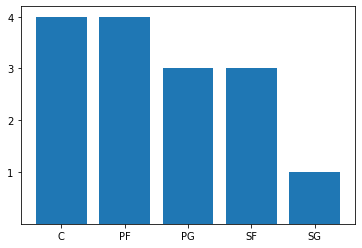

In [4]:
#方法一
plt.bar([1, 2, 3, 4, 5], pos)
plt.xticks([1, 2, 3, 4, 5], pos.index)
plt.yticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

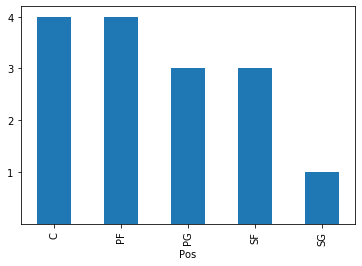

In [5]:
#方法二
pos.plot.bar()
plt.yticks([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

## 案例2：一組數值資料依照類別分組排序

例如:想知道1995-1996年球季中芝加哥公牛隊**各衝鋒位置的平均每場得分**  
依照類別分組 >> 算平均分數 >> 會長條圖  

In [6]:
#讀取檔案、並整理
per_game_url = "https://storage.googleapis.com/ds_data_import/stats_per_game_chicago_bulls_1995_1996.csv"
player_info_url = "https://storage.googleapis.com/ds_data_import/chicago_bulls_1995_1996.csv"
per_game = pd.read_csv(per_game_url)
player_info = pd.read_csv(player_info_url)
print(per_game.head(3))
print(player_info.head(3))

   Rk            Name  Age   G  GS    MP    FG   FGA    FG%   3P  ...    FT%  \
0   1  Michael Jordan   32  82  82  37.7  11.2  22.6  0.495  1.4  ...  0.834   
1   2  Scottie Pippen   30  77  77  36.7   7.3  15.8  0.463  1.9  ...  0.679   
2   3   Dennis Rodman   34  64  57  32.6   2.3   4.8  0.480  0.0  ...  0.528   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF  PTS/G  
0  1.8  4.8   6.6  4.3  2.2  0.5  2.4  2.4   30.4  
1  2.0  4.5   6.4  5.9  1.7  0.7  2.7  2.6   19.4  
2  5.6  9.3  14.9  2.5  0.6  0.4  2.2  3.1    5.5  

[3 rows x 28 columns]
   No.        Player Pos   Ht   Wt     Birth Date  \
0    0   Randy Brown  PG  6-2  190   May 22, 1968   
1   30  Jud Buechler  SF  6-6  220  June 19, 1968   
2   35  Jason Caffey  PF  6-8  255  June 12, 1973   

                                             College  
0  University of Houston, New Mexico State Univer...  
1                              University of Arizona  
2                              University of Alabama  


In [7]:
df = pd.merge(player_info, per_game[["Name", "PTS/G"]], left_on="Player", right_on="Name")
df.head(3)

,No.,Player,Pos,Ht,Wt,Birth Date,College,Name,PTS/G
0,0,Randy Brown,PG,6-2,190,"May 22, 1968","University of Houston, New Mexico State Univer...",Randy Brown,2.7
1,30,Jud Buechler,SF,6-6,220,"June 19, 1968",University of Arizona,Jud Buechler,3.8
2,35,Jason Caffey,PF,6-8,255,"June 12, 1973",University of Alabama,Jason Caffey,3.2


In [8]:
grouped = df.groupby("Pos") #依照類別分組
points_per_game = grouped["PTS/G"].mean() #算平均得分

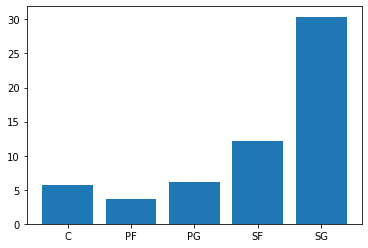

In [9]:
#方法一
plt.bar([1, 2, 3, 4, 5], points_per_game)
plt.xticks([1, 2, 3, 4, 5], points_per_game.index)
plt.show()

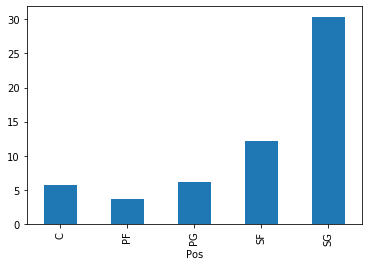

In [10]:
#方法二
points_per_game.plot.bar()
plt.show()

## 案例3：一組數值資料的分布

例如: 想知道NBA球員**年薪分布概況**  

In [11]:
from pyquery import PyQuery as pq
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def get_nba_salary():
    """
    Get NBA players' salary from SPORTRAC.COM
    """
    nba_salary_ranking_url = "https://www.spotrac.com/nba/rankings/"
    html_doc = pq(nba_salary_ranking_url)
    player_css = ".team-name"
    pos_css = ".rank-position"
    salary_css = ".info"
    players = [p.text for p in html_doc(player_css)]
    positions = [p.text for p in html_doc(pos_css)]
    salaries = [s.text.replace("$", "") for s in html_doc(salary_css)]
    salaries = [int(s.replace(",", "")) for s in salaries]
    df = pd.DataFrame()
    df["player"] = players
    df["pos"] = positions
    df["salary"] = salaries
    return df

nba_salary = get_nba_salary()
nba_salary

,player,pos,salary
0,Stephen Curry,Point Guard,40231758
1,Chris Paul,Point Guard,38506482
2,Russell Westbrook,Point Guard,38506482
3,James Harden,Shooting Guard,38199000
4,Kevin Durant,Small Forward,38199000
...,...,...,...
95,Michael Kidd-Gilchrist,Small Forward,13000000
96,Thaddeus Young,Power Forward,12900000
97,Will Barton,Shooting Guard,12776786
98,Courtney Lee,Shooting Guard,12759670


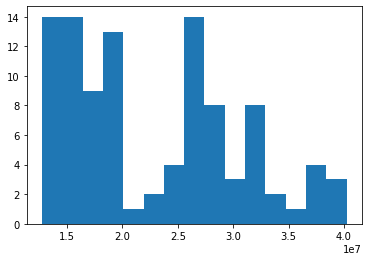

In [13]:
#方法一
plt.hist(nba_salary["salary"], bins=15)
plt.show()

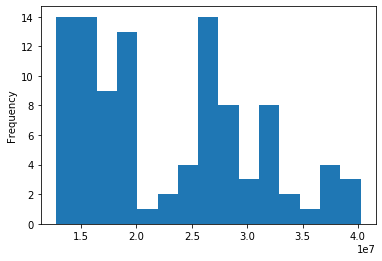

In [14]:
#方法二
nba_salary["salary"].plot.hist(bins=15)
plt.show()

## 案例4：一組數值資料依類別分組的分佈

例如: 想知道NBA球員**依照不同衝鋒位置的年薪分佈**  
依照類別分組 >> 畫盒鬚圖

In [15]:
box_df = nba_salary.pivot(index='player', columns='pos', values='salary')
box_df


pos,Center,Point Guard,Power Forward,Shooting Guard,Small Forward
player,,,,,
Aaron Gordon,NaN,NaN,19863636.0,NaN,NaN
Al Horford,28000000.0,NaN,NaN,NaN,NaN
Allen Crabbe,NaN,NaN,NaN,18500000.0,NaN
Andre Drummond,27093019.0,NaN,NaN,NaN,NaN
Andre Iguodala,NaN,NaN,NaN,NaN,17185185.0
...,...,...,...,...,...
Tristan Thompson,18539130.0,NaN,NaN,NaN,NaN
Tyler Johnson,NaN,NaN,NaN,19245370.0,NaN
Victor Oladipo,NaN,NaN,NaN,21000000.0,NaN


In [16]:
data_to_plot = [box_df[col].values[~np.isnan(box_df[col].values)] for col in box_df.columns]
data_to_plot

[array([28000000., 27093019., 17000000., 14896552., 14471910., 13333334.,
        16229213., 27093019., 15450051., 27504630., 16000000., 13250000.,
        27285000., 28942830., 25595700., 14041096., 18000000., 27504630.,
        28000000., 25008427., 25842697., 18539130.]),
 array([15643750., 38506482., 27285000., 29802321., 15500000., 15625000.,
        19217900., 19000000., 38199000., 13437500., 26996111., 32742000.,
        34996296., 31742000., 20000000., 32511623., 18086957., 16200000.,
        38506482., 40231758., 19894737.]),
 array([19863636., 27093019., 34449964., 15000000., 17650000., 18539130.,
        25842697., 15349400., 18000000., 27285000., 26000000., 15000000.,
        15006250., 30350000., 23271605., 12900000.]),
 array([18500000., 27093019., 27556959., 12759670., 14634146., 27739975.,
        27285000., 14057730., 17150000., 17839286., 13486300., 38199000.,
        32742000., 19269662., 32742000., 25565217., 20025127., 19245370.,
        21000000., 12776786., 19500

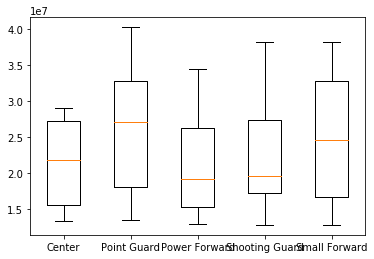

In [17]:
#方法一
plt.boxplot(data_to_plot)
plt.xticks(range(1, 6), box_df.columns)
plt.show()

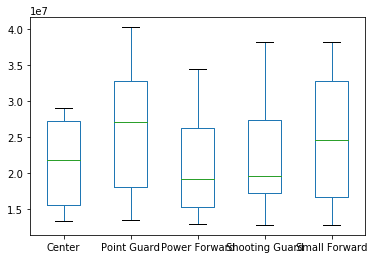

In [18]:
#方法二
box_df.plot.box()
plt.show()

## 案例5：兩組數值資料的相關

例如: 想知道NBA球員**年薪與平均每場得分的相關性**  


In [ ]:
from requests import get

def get_pts_game():
    """
    Get NBA players' PTS/G from NBA.com
    """
    nba_stats_url = "https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2017-18&SeasonType=Regular+Season&StatCategory=PTS"
    pts_game_dict = get(nba_stats_url).json()
    players = [pts_game_dict["resultSet"]["rowSet"][i][2] for i in range(len(pts_game_dict["resultSet"]["rowSet"]))]
    pts_game = [pts_game_dict["resultSet"]["rowSet"][i][22] for i in range(len(pts_game_dict["resultSet"]["rowSet"]))]
    df = pd.DataFrame()
    df["player"] = players
    df["pts_game"] = pts_game
    return df


pts_game = get_pts_game()
df = pd.merge(nba_salary, pts_game)

In [ ]:
#方法一
plt.scatter(df["pts_game"], df["salary"])
plt.show()

In [ ]:
#方法二
df.plot.scatter("pts_game", "salary")
plt.show()

## 案例6：數值資料隨著日期時間變動趨勢

例如: 想知道NBA球員Paul Pierce **每一個利平均每場得分、助攻、籃板變動趨勢**  

In [19]:
def get_pp_stats():
    """
    Get Paul Pierce stats from basketball-reference.com
    """
    stats_url = "https://www.basketball-reference.com/players/p/piercpa01.html"
    html_doc = pq(stats_url)
    pts_css = "#per_game .full_table .right:nth-child(30)"
    ast_css = "#per_game .full_table .right:nth-child(25)"
    reb_css = "#per_game .full_table .right:nth-child(24)"
    year = [str(i)+"-01-01" for i in range(1999, 2018)]
    pts = [float(p.text) for p in html_doc(pts_css)]
    ast = [float(a.text) for a in html_doc(ast_css)]
    reb = [float(r.text) for r in html_doc(reb_css)]
    df = pd.DataFrame()
    df["year"] = year
    df["pts"] = pts
    df["ast"] = ast
    df["reb"] = reb
    return df

pp_stats = get_pp_stats()
pp_stats["year"] = pd.to_datetime(pp_stats["year"])
pp_stats = pp_stats.set_index("year")

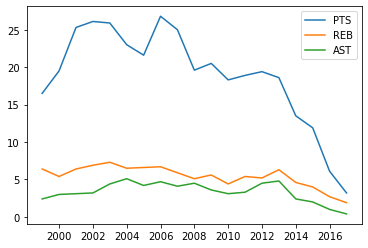

In [20]:
#方法一
plt.plot(pp_stats["pts"])#得分
plt.plot(pp_stats["reb"])#籃板
plt.plot(pp_stats["ast"])#助攻
plt.legend(['PTS', 'REB', 'AST'], loc='upper right') #加入圖例
plt.show()

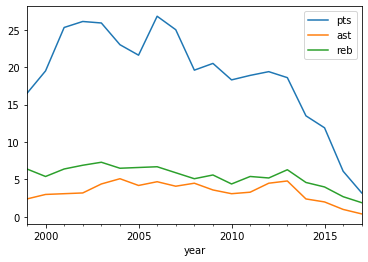

In [21]:
#方法二
pp_stats.plot.line()
plt.show()